## Explore weather trends udacity project
#### by Radek Švamberg

### SQL query 

First, I queried cities from my country with the following code

In [ ]:
SELECT * FROM city_list WHERE country='Czech Republic'

After that I downloaded the data as a .csv file

In [ ]:
SELECT * FROM city_data WHERE city='Prague'

..and also the global data

In [ ]:
SELECT * FROM global_data

which leads me to having 2 .csv files: global_data.csv and prague_city_data.csv

I will be doing the project in Python using seaborn, pandas, matplotlib, sklearn and numpy libraries

### Loading data

In [262]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

CITY_DATA_PATH = 'prague_city_data.csv'
GLOBAL_DATA_PATH = 'global_data.csv'


In [286]:
prague_city_data_df = pd.read_csv(CITY_DATA_PATH).drop({'country','city'}, axis=1).dropna()
global_data_df = pd.read_csv(GLOBAL_DATA_PATH).dropna()

In [287]:
print(prague_city_data_df.shape)
print(global_data_df.shape)

(267, 2)
(266, 2)


In [288]:
prague_city_data_df.head(300)

,year,avg_temp
0,1743,5.08
1,1744,9.78
2,1745,0.69
7,1750,9.11
8,1751,9.13
...,...,...
266,2009,9.47
267,2010,8.13
268,2011,9.84
269,2012,9.51


In [289]:
global_data_df.head(300)

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
...,...,...
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57


In [290]:
print(global_data_df.dtypes)
print(prague_city_data_df.dtypes)

year          int64
avg_temp    float64
dtype: object
year          int64
avg_temp    float64
dtype: object


### Data wrangling for a better visualization

In [291]:
minimum = max(prague_city_data_df.iloc[0].year, global_data_df.iloc[0].year).astype(np.int64)
maximum = min(prague_city_data_df.iloc[-1].year, global_data_df.iloc[-1].year).astype(np.int64)
print(f'Min year: {minimum}')
print(f'Max year: {maximum}')

Min year: 1750
Max year: 2013


In [292]:
global_data_df = global_data_df.loc[~((global_data_df['year'] < minimum) 
                                      | (global_data_df['year'] > maximum)),:]

prague_city_data_df = prague_city_data_df.loc[~((prague_city_data_df['year'] < minimum) 
                                                | (prague_city_data_df['year'] > maximum)),:]

In [293]:
print(prague_city_data_df.shape)
print(global_data_df.shape)


(264, 2)
(264, 2)


In [294]:
global_data_df.head(300)

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
...,...,...
259,2009,9.51
260,2010,9.70
261,2011,9.52
262,2012,9.51


In [295]:
prague_city_data_df.head(300)

,year,avg_temp
7,1750,9.11
8,1751,9.13
9,1752,3.94
10,1753,8.08
11,1754,7.85
...,...,...
266,2009,9.47
267,2010,8.13
268,2011,9.84
269,2012,9.51


In [296]:
prague_city_data_df["avg_moving"] = prague_city_data_df["avg_temp"].rolling(window = 7).mean()

prague_city_data_df.reset_index(inplace = True, drop = True)

global_data_df["avg_moving"] = global_data_df["avg_temp"].rolling(window = 7).mean()

prague_city_data_df.name = 'Prague'
global_data_df.name = 'Global'


In [297]:
prague_city_data_df.head(10)

,year,avg_temp,avg_moving
0,1750,9.11,NaN
1,1751,9.13,NaN
2,1752,3.94,NaN
3,1753,8.08,NaN
4,1754,7.85,NaN
5,1755,7.62,NaN
6,1756,8.75,7.782857
7,1757,8.33,7.671429
8,1758,7.49,7.437143
9,1759,8.35,8.067143


Global slope: [[0.00461111]]
Prague slope: [[0.00367961]]


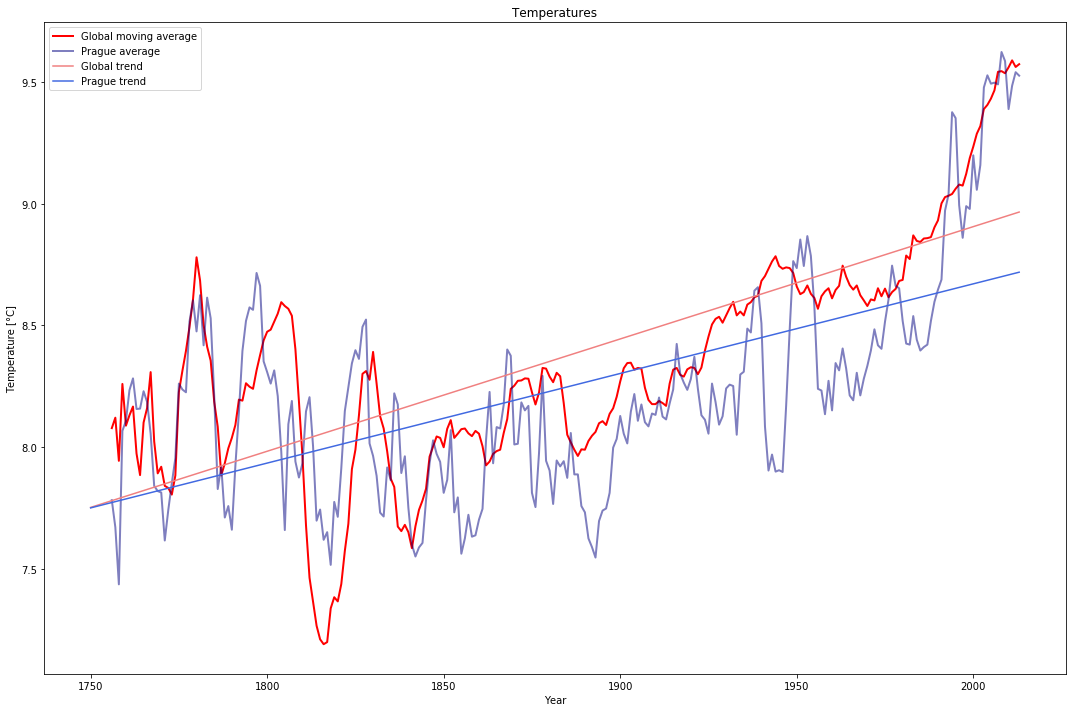

In [316]:
fig, ax = plt.subplots(figsize = (15,10))  
add_trend_to_df(global_data_df)
add_trend_to_df(prague_city_data_df)

sns.lineplot(x = "year", y = "avg_moving", data = global_data_df, label = "Global moving average",
             color = "red", lw = 2)

sns.lineplot(x = "year", y = "avg_moving", data= prague_city_data_df, label= "Prague average", alpha = 0.5,
             color = "navy", lw = 2)
sns.lineplot(x = "year", y = "trend", data = global_data_df, label = "Global trend", color = "lightcoral")
sns.lineplot(x = "year", y = "trend", data = prague_city_data_df, label = "Prague trend", color = "royalblue")

ax.legend()
ax.set_ylabel("Temperature [°C]")
ax.set_xlabel("Year")
ax.set_title("Temperatures")
plt.tight_layout()


In [304]:
def add_trend_to_df(df):
    try:
        trend_model = LinearRegression()
        X = df["year"]
        trend_model.fit(X = df[["year"]], y = df[["avg_temp"]])
        trend_plot = trend_model.predict(df[["year"]])
        df["trend"] = trend_plot
        print(f"{df.name} slope: {trend_model.coef_}")

    except:
        print(f'Error while calculating trend')

In [307]:
prague_city_data_df[["avg_temp"]].corrwith(global_data_df["avg_temp"])

avg_temp    0.517957
dtype: float64

In [313]:
prague_city_data_df.avg_moving.describe()

count    258.000000
mean       8.226434
std        0.449141
min        7.437143
25%        7.915000
50%        8.175000
75%        8.420714
max        9.622857
Name: avg_moving, dtype: float64

In [314]:
global_data_df.avg_moving.describe()

count    258.000000
mean       8.350781
std        0.462115
min        7.191429
25%        8.056071
50%        8.303571
75%        8.627500
max        9.588571
Name: avg_moving, dtype: float64

### Observations:
- In the graph above we can see that both global and Prague average temperatures have been steadily going up since the 1700s (global uptrend in average temperatures)
- Temperatures are rising faster in the last 50 years
- Global data show more uptrend than Prague data (slope values)
- Moderate correlation between Prague temperatures and global temperatures
- Prague has slightly lower average temperatures than the global average (8.2°C Prague x 8.4°C global)